In [1]:
import pickle
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt

from function.utilities import get_subset

# param

In [2]:
#####CHANGE HERE#####
algorithm = "VL3-BA"
#####CHANGE HERE#####

In [3]:
plot_subset = ['>30','>40','>50'] #'>20', '>30', '>40', '>50', '>60' 

# load data

In [4]:
pondr_disorder_ident_path = Path("./output/pondr_disorder_ident")
od_human_df = pd.read_pickle(
    pondr_disorder_ident_path / "{}_od_human_df.pkl".format(algorithm)
)
od_rbp_df = get_subset(od_human_df, "rbp")
od_mrbp_df = get_subset(od_human_df, "mrbp")

## diff list of rbp
numbers of rbps(1535) is a bit less than "Gerstberger, et al."(1542), mainly cause by duplicate records,
more informations are shown below


|no.|  gene name form  <br>Gerstberger, et al  | reason  |
|----|  :----  | :----  |
|1| PABPC1L2B | duplicate with **PABPC1L2A** |
|2| AARSD1    | duplicate with **PTGES3L-AARSD1** |
|3| FRG1B     | does not have uniprot_id |
|4| SMN2      | duplicate with **SMN1** |
|5| RPS17L    | duplicate with **RPS17**|
|6| RBMY1F    | duplicate with **RBMY1J**|
|7| RPL41     | sequence is too short |
|8| hCG_2045905| unreviewed from uniprot |
|9| VARS2| unreviewed from uniprot |

# consecutive disordered stat

In [5]:
# 微小差距是因為我用>= 老施用 >

In [43]:
def length_filter(disorder_length, od_ident):

    count = 0
    for i in od_ident:
        if i == "1":
            count = count + 1
            if count >= disorder_length:
                return 1
        else:
            count = 0

    return 0


def make_consecutive_disorder_stat(df):

    df[">20"] = df["od_ident"].apply(lambda x: length_filter(20, x))
    df[">30"] = df["od_ident"].apply(lambda x: length_filter(30, x))
    df[">40"] = df["od_ident"].apply(lambda x: length_filter(40, x))
    df[">50"] = df["od_ident"].apply(lambda x: length_filter(50, x))
    df[">60"] = df["od_ident"].apply(lambda x: length_filter(60, x))

    b20 = df[">20"].value_counts()[1] / len(df)
    b30 = df[">30"].value_counts()[1] / len(df)
    b40 = df[">40"].value_counts()[1] / len(df)
    b50 = df[">50"].value_counts()[1] / len(df)
    b60 = df[">60"].value_counts()[1] / len(df)

    b20 = round(b20 * 100, 1)
    b30 = round(b30 * 100, 1)
    b40 = round(b40 * 100, 1)
    b50 = round(b50 * 100, 1)
    b60 = round(b60 * 100, 1)

    return {">20": b20,
            ">30": b30, 
            ">40": b40, 
            ">50": b50,
            ">60": b60,}

In [44]:
mrbp = make_consecutive_disorder_stat(od_mrbp_df)
rbp = make_consecutive_disorder_stat(od_rbp_df)
human = make_consecutive_disorder_stat(od_human_df)

# output

In [45]:
output = {"algorithm": algorithm, "human": human, "rbp": rbp, "mrbp": mrbp}

In [46]:
output

{'algorithm': 'VL3-BA',
 'human': {'>20': 83.3, '>30': 76.3, '>40': 68.5, '>50': 61.6, '>60': 55.7},
 'rbp': {'>20': 93.3, '>30': 88.0, '>40': 80.9, '>50': 74.4, '>60': 66.6},
 'mrbp': {'>20': 93.9, '>30': 90.1, '>40': 84.3, '>50': 79.7, '>60': 74.1}}

# plot

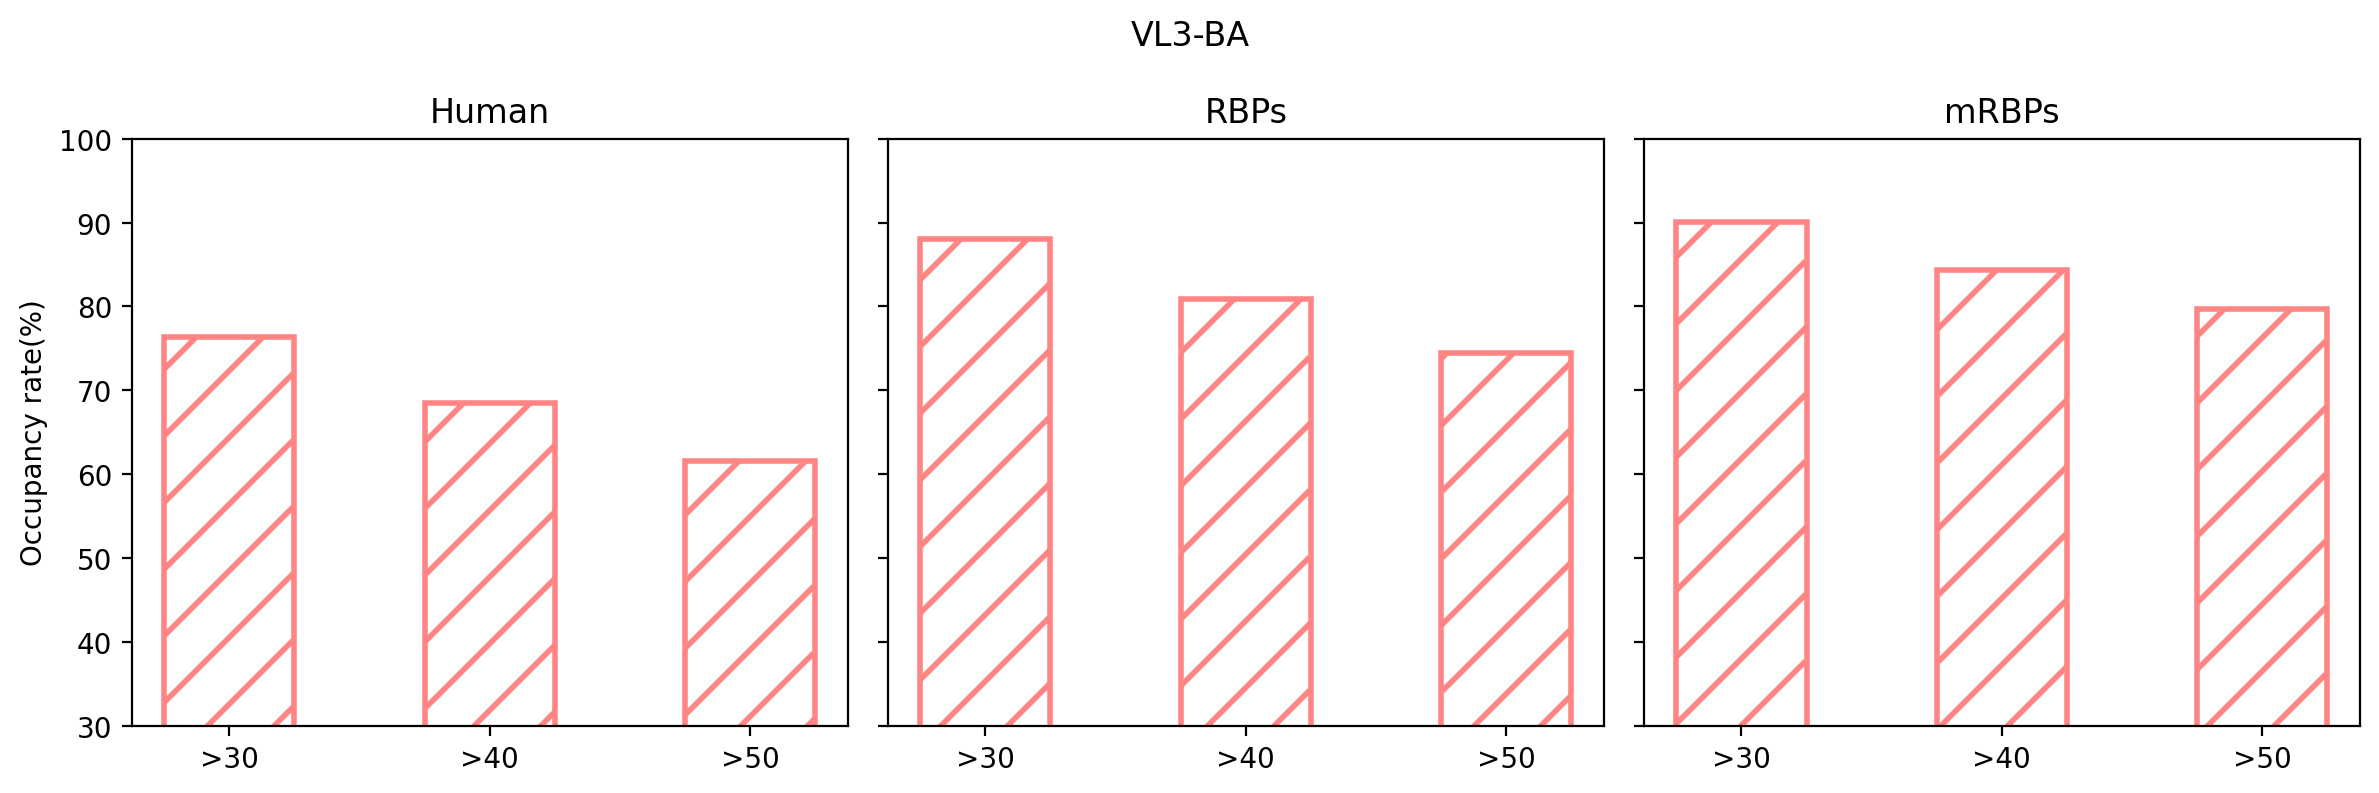

In [47]:
mpl.rcParams["hatch.linewidth"] = 2
f, (a0, a1, a2) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4), dpi=200)

X = np.arange(0, len(plot_subset))
human_plot_subset = [output["human"][x] for x in plot_subset]
rbp_plot_subset = [output["rbp"][x] for x in plot_subset]
mrbp_plot_subset = [output["mrbp"][x] for x in plot_subset]

a0.bar(X, human_plot_subset, width=0.5, tick_label=plot_subset, color="white", hatch="/", linewidth=2, edgecolor="#ff8484")
a0.set_title("Human")
a0.set_ylabel("Occupancy rate(%)")
a0.set_ylim(30, 100)

a1.bar(X, rbp_plot_subset, width=0.5, tick_label=plot_subset, color="white", hatch="/", linewidth=2, edgecolor="#ff8484")
a1.set_title("RBPs")

a2.bar(X, mrbp_plot_subset, width=0.5, tick_label=plot_subset, color="white", hatch="/", linewidth=2, edgecolor="#ff8484")
a2.set_title("mRBPs")


f.suptitle(algorithm)
f.tight_layout()